In [14]:
%pip install pytrends pandas selenium

Note: you may need to restart the kernel to use updated packages.


In [15]:
import time
from selenium import webdriver

def get_cookie():
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    driver = webdriver.Chrome(options=options)
    driver.get("https://trends.google.com/")
    time.sleep(5)
    cookie = driver.get_cookie("NID")["value"]
    driver.quit()
    return cookie

In [16]:
import pandas as pd
from pytrends.request import TrendReq

nid_cookie = f"NID={get_cookie()}"

ptr = TrendReq(requests_args={"headers": {"Cookie": nid_cookie}})
ptr.build_payload(kw_list=['covid', 'coronavirus'], timeframe='now 1-d', gprop = '')

data = ptr.interest_over_time()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.head(10))

                     Python  C#  isPartial
date                                      
2023-04-08 20:16:00      65  11      False
2023-04-08 20:24:00      61  10      False
2023-04-08 20:32:00      61  11      False
2023-04-08 20:40:00      57   9      False
2023-04-08 20:48:00      61  11      False
2023-04-08 20:56:00      58  10      False
2023-04-08 21:04:00      66  10      False
2023-04-08 21:12:00      64  10      False
2023-04-08 21:20:00      60  11      False
2023-04-08 21:28:00      63  10      False


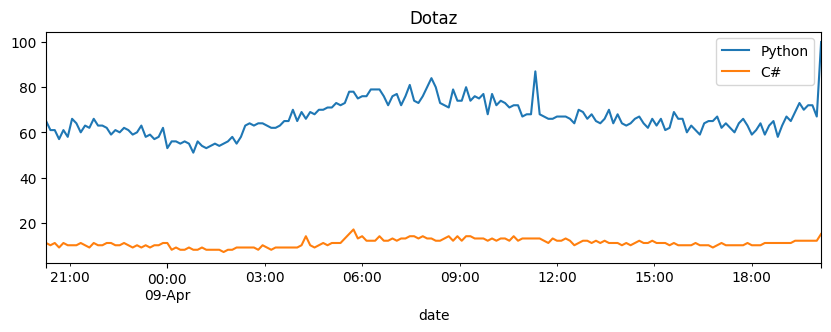

In [17]:
data.plot(kind="line", title="Dotaz", figsize=(10,3));